In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
pd.set_option("max_r", 100)

In [2]:
df = pd.read_csv('candy-data.csv')
df = df.sort_values('winpercent', ascending = False).reset_index(drop = True)
df

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,ReeseÕs Peanut Butter cup,1,0,0,1,0,0,0,0,0,0.720,0.651,84.180290
1,ReeseÕs Miniatures,1,0,0,1,0,0,0,0,0,0.034,0.279,81.866257
2,Twix,1,0,1,0,0,1,0,1,0,0.546,0.906,81.642914
3,Kit Kat,1,0,0,0,0,1,0,1,0,0.313,0.511,76.768600
4,Snickers,1,0,1,1,1,0,0,1,0,0.546,0.651,76.673782
5,ReeseÕs pieces,1,0,0,1,0,0,0,0,1,0.406,0.651,73.434990
6,Milky Way,1,0,1,0,1,0,0,1,0,0.604,0.651,73.099556
7,ReeseÕs stuffed with pieces,1,0,0,1,0,0,0,0,0,0.988,0.651,72.887901
8,Peanut butter M&MÕs,1,0,0,1,0,0,0,0,1,0.825,0.651,71.465050
9,Nestle Butterfinger,1,0,0,1,0,0,0,1,0,0.604,0.767,70.735641


In [3]:
len(df)

85

In [4]:
ingredients = df.columns.drop(['sugarpercent', 'pricepercent', 'competitorname', 'winpercent'])
characteristics = ['sugarpercent', 'pricepercent']
features = df.columns.drop(['competitorname', 'winpercent'])

In [5]:
pd.DataFrame(df[ingredients].sum())

,0
chocolate,37
fruity,38
caramel,14
peanutyalmondy,14
nougat,7
crispedricewafer,7
hard,15
bar,21
pluribus,44


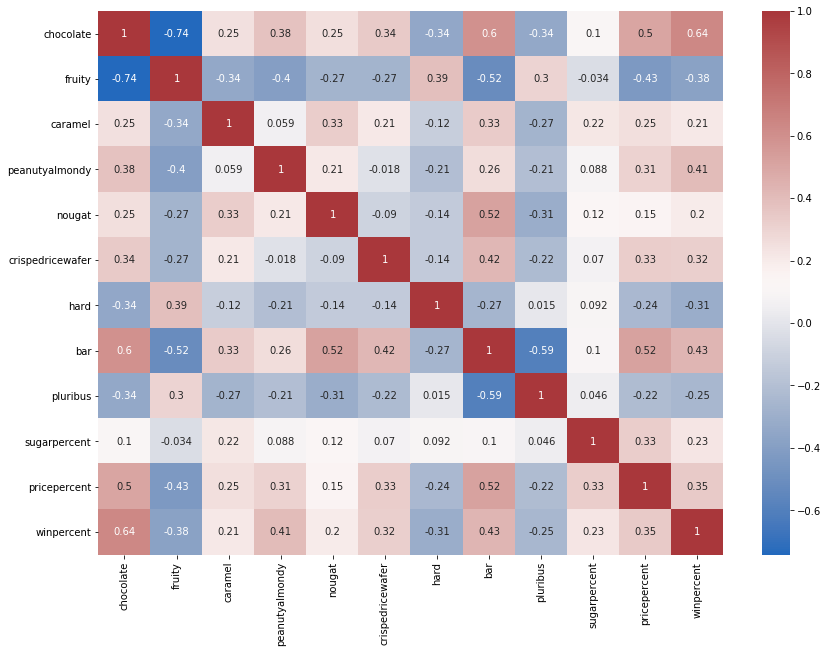

In [6]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), cmap='vlag', annot=True)

In [7]:
df['winner'] = df['winpercent'].apply(lambda x : 'winner' if x > 50 else 'loser')

In [8]:
df

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,winner
0,ReeseÕs Peanut Butter cup,1,0,0,1,0,0,0,0,0,0.720,0.651,84.180290,winner
1,ReeseÕs Miniatures,1,0,0,1,0,0,0,0,0,0.034,0.279,81.866257,winner
2,Twix,1,0,1,0,0,1,0,1,0,0.546,0.906,81.642914,winner
3,Kit Kat,1,0,0,0,0,1,0,1,0,0.313,0.511,76.768600,winner
4,Snickers,1,0,1,1,1,0,0,1,0,0.546,0.651,76.673782,winner
5,ReeseÕs pieces,1,0,0,1,0,0,0,0,1,0.406,0.651,73.434990,winner
6,Milky Way,1,0,1,0,1,0,0,1,0,0.604,0.651,73.099556,winner
7,ReeseÕs stuffed with pieces,1,0,0,1,0,0,0,0,0,0.988,0.651,72.887901,winner
8,Peanut butter M&MÕs,1,0,0,1,0,0,0,0,1,0.825,0.651,71.465050,winner
9,Nestle Butterfinger,1,0,0,1,0,0,0,1,0,0.604,0.767,70.735641,winner


In [9]:
winners = df[df['winner'] == 'winner']
win_pct = winners[ingredients].sum()
win_pct

chocolate           28
fruity              11
caramel             10
peanutyalmondy      12
nougat               5
crispedricewafer     6
hard                 1
bar                 17
pluribus            17
dtype: int64

In [10]:
win_pct.sort_index()

bar                 17
caramel             10
chocolate           28
crispedricewafer     6
fruity              11
hard                 1
nougat               5
peanutyalmondy      12
pluribus            17
dtype: int64

In [11]:
plt.style.use('seaborn-pastel')

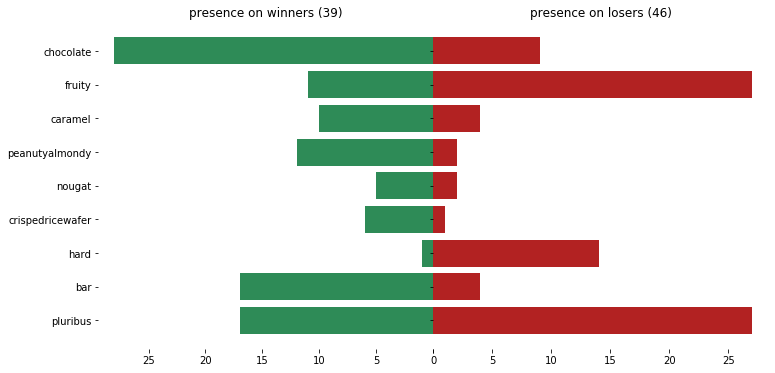

In [12]:
winners = df[df['winner'] == 'winner']
winners_count = winners[ingredients].sum() * -1

losers = df[df['winner'] == 'loser']
losers_count = losers[ingredients].sum()

fig, ax = plt.subplots(1,2, sharey = True, figsize = (12,6))
plt.subplots_adjust(wspace = 0)

ax[0].barh(winners_count.index,
           winners_count.values,
           color = 'seagreen')
ax[0].set_title(f'presence on winners ({len(winners)})')
ax[0].set_xticklabels(labels=np.arange(25,0,-5))
ax[0].set_xticks(ticks=np.arange(-25,1,5))
#axes[0].set_xticks(ticks=np.arange(-30,0,5), labels=(np.arange(30,0,5))
ax[1].barh(losers_count.index,
           losers_count.values,
           color = 'firebrick')
ax[1].set_title(f'presence on losers ({len(losers)})')

plt.gca().invert_yaxis()
sns.despine(left = True, bottom = True)
plt.savefig('winners_losers.png')
# for ax in axes:
#     ax.spines['right'].set_visible(False)

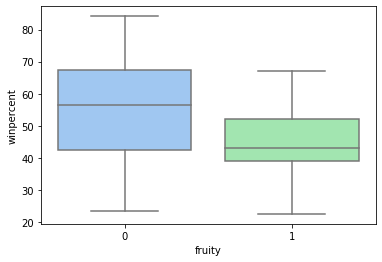

In [13]:
sns.boxplot(x = 'fruity', y = 'winpercent', data = df)

In [18]:
x = df[ingredients.drop('fruity')]
y = df['winpercent']
x = sm.add_constant(x)

model = sm.OLS(y, x)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             winpercent   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.411
Method:                 Least Squares   F-statistic:                     8.334
Date:                Wed, 07 Oct 2020   Prob (F-statistic):           4.80e-08
Time:                        10:59:20   Log-Likelihood:                -321.89
No. Observations:                  85   AIC:                             661.8
Df Residuals:                      76   BIC:                             683.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               42.6170      3.081  